# 55. Data visualization with Python

# 55. Visualización de datos con Python

In [2]:
!pip3 install -q pygal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.5 MB/s eta 0:00:00


In [3]:
!pip install -q highcharts-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 672.3/672.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import matplotlib.pyplot as plt, pylab as pl
import seaborn as sb, altair as alt, pygal as pg
import bokeh, plotly, folium
from highcharts_core import highcharts as hch
import numpy as np

Basic structures: points, lines, texts (Matplotlib)

Estructuras básicas: puntos, líneas, textos (Matplotlib)

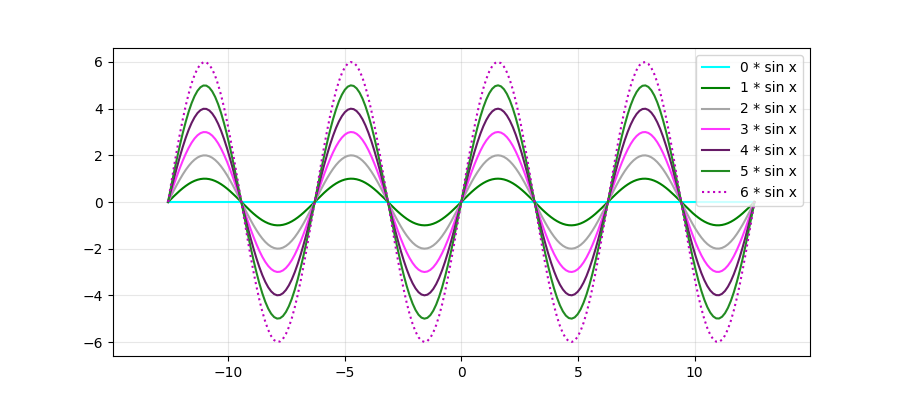

In [5]:
# plt.plot() → ax.plot(); plt.ylabel() → ax.set_ylabel()
x = np.linspace(-4*np.pi, 4*np.pi, 200)
colors = ('cyan', 'g', '.65', '#ff36ff', (.4, .1, .4), 'forestgreen')
fig = pl.figure(figsize=(9, 4))
[pl.plot(x, np.sin(x)*i, color=colors[i], label='%d * sin x'%i)
 for i in range(6)]
# line style and color at the same time
# estilo de línea y color al mismo tiempo
pl.plot(x, np.sin(x)*6, ':m', label='6 * sin x')
pl.legend(loc='best'); pl.grid(alpha=.3)
pl.axis([-1, 7, -6.5, 6.5]); pl.axis('equal')
# only for file saving / solo para guardar archivos
pl.close(fig)
fig.savefig('figure1.png')
from IPython.display import Image
Image('figure1.png')

In [6]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

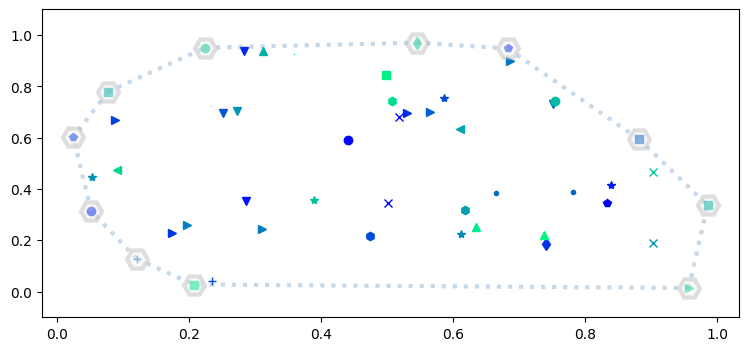

In [7]:
cmaps = ['ocean', 'cool', 'gnuplot2', 'terrain', 'jet',
         'winter', 'spring', 'summer', 'autumn', 'rainbow']
markers = ['.', ',', '*', 'x', '+', 'v', '^', '<', '>',
           's', 'p', 'd', 'h', 'o']
rng = np.random.default_rng(); n = 50
markers = np.random.choice(markers, size=n)
colors = [pl.get_cmap(cmaps[5])(i/n) for i in range(n)]
# the mechanism for calculating the minimum polygon including all points
# el mecanismo para calcular el polígono mínimo incluyendo todos los puntos
from scipy.spatial import ConvexHull
xy = rng.random((n, 2)); hull = ConvexHull(xy)
pl.figure(figsize=(9, 4))
for i in range(n):
    pl.plot(xy[i, 0], xy[i, 1], markers[i], color=colors[i])
for simplex in hull.simplices:
    pl.plot(xy[simplex, 0], xy[simplex, 1], ':H', color='steelblue',
         markersize=15, linewidth=3, alpha=.3,
         markerfacecolor='whitesmoke', markeredgecolor='silver',
         markeredgewidth=3);
pl.ylim(-.1, 1.1);

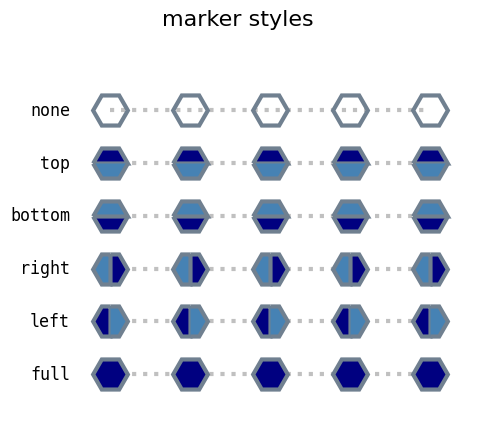

In [8]:
text_style = dict(
    horizontalalignment='right',verticalalignment='center',
    fontsize=12, fontfamily='monospace')
filled_marker_style=dict(
    marker='H', linestyle=':', markersize=25, lw=3, color='silver',
    markerfacecolor='navy', markerfacecoloralt='steelblue',
    markeredgecolor='slategray', markeredgewidth=3)
fig, ax = pl.subplots()
fig.suptitle('marker styles', fontsize=16)
fig.subplots_adjust(left=.2)
for y, fill_style in enumerate(pl.Line2D.fillStyles):
    ax.text(-.5, y, repr(fill_style)[1:-1], **text_style)
    ax.plot([y]*5, fillstyle=fill_style, **filled_marker_style)
ax.margins(.2); ax.set_axis_off();

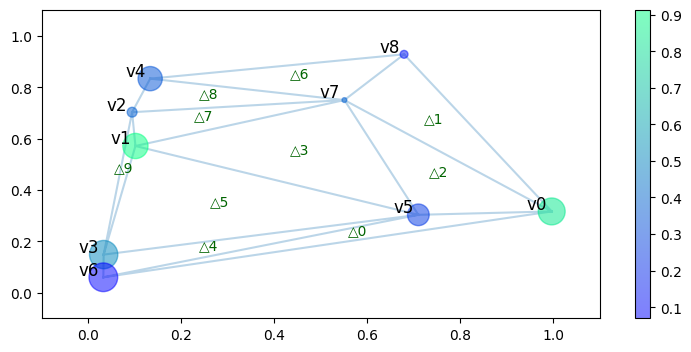

In [9]:
rng = np.random.default_rng()
n = 9; xy = rng.random((n, 2))
colors = rng.random(n)
sizes = (500 * rng.random(n)).round()
# mechanism for combining points with triangles
# mecanismo para combinar puntos con triángulos
from scipy.spatial import Delaunay
triangles = Delaunay(xy)
pl.figure(figsize=(9, 4))
pl.triplot(xy[:, 0], xy[:,1], triangles.simplices, alpha=.3)
pl.scatter(xy[:, 0], xy[:, 1], c=colors, s=sizes, alpha=.5, cmap='winter')
pl.colorbar(); pl.xlim(-.1, 1.1); pl.ylim(-.1, 1.1)
# vertex numbering / numeración de vértices
for j, p in enumerate(xy):
    pl.text(p[0]-0.01, p[1]+.01, 'v%d'%j, ha='right', fontsize=12)
# triangle numbering / numeración de triángulos
for j,s in enumerate(triangles.simplices):
    p = xy[s].mean(axis=0)
    pl.text(p[0], p[1], '△%d'%j, c='darkgreen', ha='center', fontsize=10)

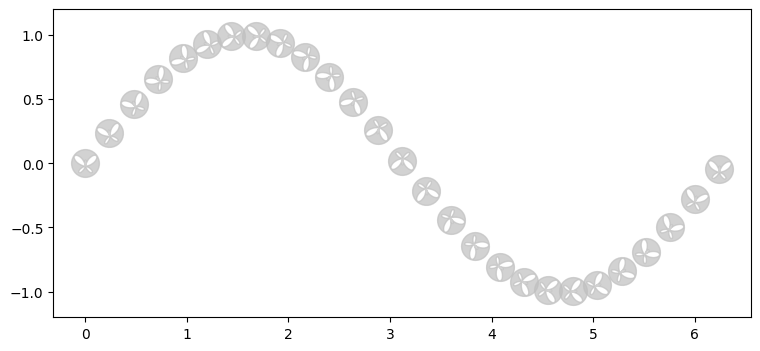

In [10]:
from matplotlib.path import Path
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
t = np.arange(0, 2*np.pi, .06)
def f(t): return np.exp(np.cos(t)**2 + np.sin(t)) - 3 * np.cos(4 * t)
def fx(k,t): return .17 * (k + 1) * f(t) * np.cos(t)
def fy(k,t): return .17 * (k + 1) * f(t) * np.sin(t) - .2
xt = np.round(fx(0, t), 2); yt = np.round(fy(0, t), 2)
verts = np.vstack((xt, yt)).T
codes = np.array(
    [Path.MOVETO] + (len(verts) - 2) * [Path.LINETO] + [Path.CLOSEPOLY],
    dtype='uint8')
form = Path(verts, codes)
circle = Path.unit_circle()
cutform = Path(
    vertices = np.concatenate([circle.vertices, form.vertices[::-1,...]]),
    codes = np.concatenate([np.array(circle.codes), np.array(form.codes)]))
angles = np.array(360 * t / (2 * np.pi), dtype='int').tolist()
fig, ax = pl.subplots(figsize=(9, 4))
for i, theta in enumerate(angles[::4]):
    m = MarkerStyle(cutform, transform=Affine2D().rotate_deg(theta))
    ax.plot(t[4*i], np.sin(t[4*i]), marker=m,
            color='silver', markersize=20, alpha=.7)
ax.set_ylim(-1.2, 1.2);

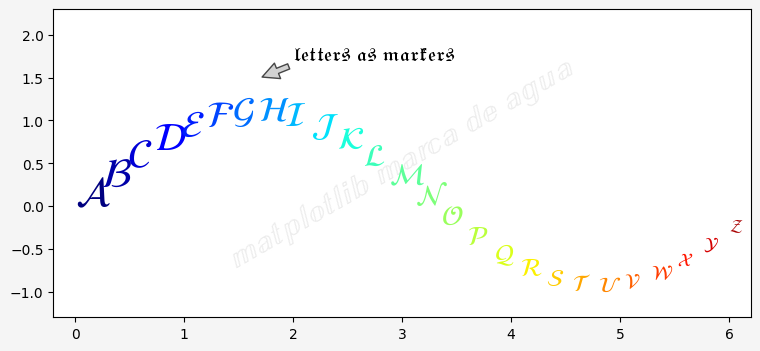

In [11]:
fig, ax = pl.subplots(figsize=(9, 4), facecolor='whitesmoke')
get_func = [func for func in dir(ax) if func.startswith("get")]
ax.text(.5, .5,'$\mathbb{matplotlib \\; marca \\; de \\; agua}$',
        transform=ax.transAxes, fontsize=24, alpha=.3, color='silver',
        ha='center', va='center', rotation=30)
ax.annotate('$\mathfrak{letters \\; as \\; markers}$',
            xy=(1.7, 1.5), xytext=(2.,1.7), fontsize=14,
            arrowprops=dict(facecolor='silver', alpha=.7, shrink=.05),)
def plot_text(n=26, ax=ax):
    x = np.linspace(0, 6, n); y = np.sin(x)
    colors = [pl.get_cmap('jet')(i/n) for i in range(n)]
    ax.set_xlim(-.2, 6.2); ax.set_ylim(-1.3, 2.3)
    for i in range(n):
        ax.text(x[i], y[i], "$\mathcal{%s}$"%chr(65+i),
                color=colors[i], fontsize=30-i*.7)
    return ax
ax = plot_text()

In [12]:
# ax properties / propiedades
get_func[:5]

['get_adjustable', 'get_agg_filter', 'get_alpha', 'get_anchor', 'get_animated']

In [13]:
# information about the properties of a specific object
# información sobre las propiedades de un objeto específico
pl.getp(ax)

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = False
    autoscalex_on = False
    autoscaley_on = False
    axes_locator = None
    axisbelow = line
    box_aspect = None
    children = [Text(0.5, 0.5, '$\\mathbb{matplotlib \\; marca \\...
    clip_box = None
    clip_on = True
    clip_path = None
    data_ratio = 0.5624999999999999
    default_bbox_extra_artists = [Text(0.5, 0.5, '$\\mathbb{matplotlib \\; marca \\...
    facecolor or fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(900x400)
    frame_on = True
    gid = None
    gridspec = GridSpec(1, 1)
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 0 Line2D objects>
    mouseover = False
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=...
  

In [14]:
# options for managing object properties
# opciones para administrar propiedades de objetos
pl.setp(ax)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

In [15]:
# custom control of general settings
# control personalizado de la configuración general
from matplotlib import rcParams
pt = tuple(rcParams.items())
pt[30] + pt[120:125]

('axes.prop_cycle',
 cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
 ('figure.subplot.bottom', 0.11),
 ('figure.subplot.hspace', 0.2),
 ('figure.subplot.left', 0.125),
 ('figure.subplot.right', 0.9),
 ('figure.subplot.top', 0.88))

In [16]:
from cycler import cycler
# custom default color gamma
# gamma de color predeterminada personalizada
color_lst = ['#FF355E', '#FD5B78', '#FF6037', '#FF9966', '#FF9933', '#FFCC33',
             '#FFFF66', '#CCFF00', '#66FF66', '#AAF0D1', '#50BFE6', '#FF6EFF',
             '#EE34D2', '#FF00CC']
# Crayola Fluorescent Colors
color_names = ['Radical Red', 'Wild Watermelon', 'Outrageous Orange',
               'Atomic Tangerine', 'Neon Carrot', 'Sunglow',
               'Laser Lemon', 'Electric Lime', 'Screamin` Green',
               'Magic Mint', 'Blizzard Blue', 'Shocking Pink',
               'Razzle Dazzle Rose', 'Hot Magenta']
# for the entire software environment
# para todo el entorno de software
rcParams['axes.prop_cycle'] = cycler('color', color_lst)

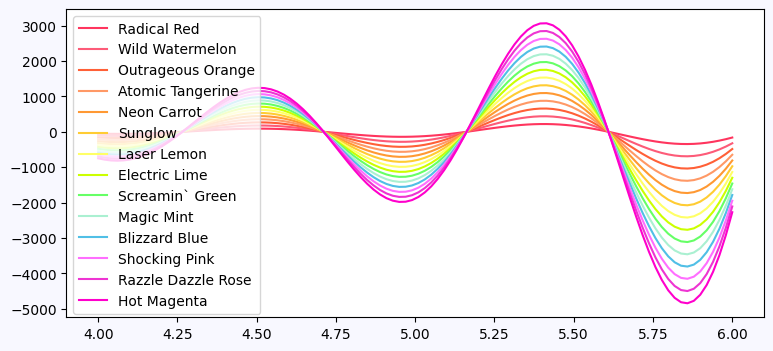

In [17]:
x = np.linspace(4, 6, 100)
set_dict = {'figsize':(9, 4),'facecolor':'ghostwhite'}
fig, ax = pl.subplots(**set_dict)
# only for one chart
# solo para un gráfico
#prop_cycler = (cycler('color', color_lst[:4])
#               +cycler(ls=["-", "--", "-.", ":"])
#               +cycler(lw=[1, 2, 3, 4]))
#ax.set_prop_cycle(prop_cycler)
# for i in range(4):
for i in range(14):
    ax.plot(x, np.exp(x)*np.cos(7*x)*(i+1)-i, label=color_names[i])
ax.legend(loc=2);

In [18]:
# reset to default settings
# restablecer la configuración predeterminada
plt.rcdefaults()
pl.rcdefaults()

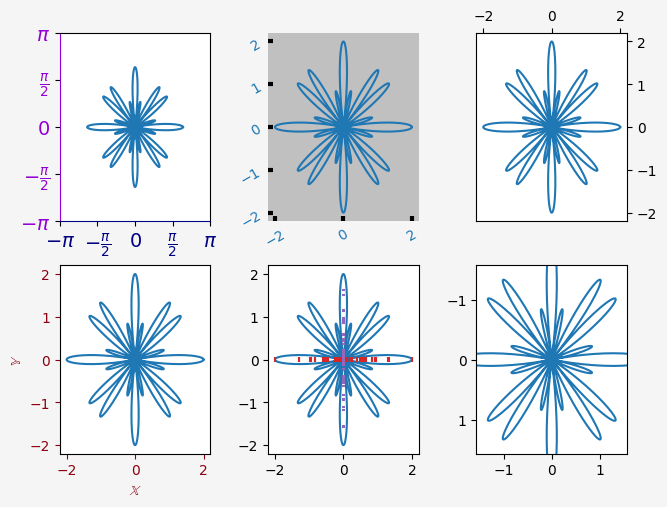

In [19]:
# parameters for chart design
# parámetros para el diseño de gráficos
t = np.linspace(0, 2*np.pi, 1000)
f = np.cos(14 * t) + np.cos(6 * t)
x = f * np.cos(t); y = f * np.sin(t)
fig, ax = pl.subplots(2, 3)
fig.tight_layout()
rect = fig.patch
rect.set_facecolor('whitesmoke')
for a in ax.flatten(): a.plot(x, y)
ticks = [[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
         [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$',
          r'$\frac{\pi}{2}$', r'$\pi$']]
# formatting axis markings and colors
# formato de marcas y colores de ejes
ax[0, 0].set_xticks(ticks[0])
ax[0, 0].spines['bottom'].set_color('navy')
ax[0, 0].set_xticklabels(ticks[1], fontsize=14, color='navy')
ax[0, 0].set_yticks(ticks[0])
ax[0, 0].spines['left'].set_color('#9400d3') # hex notation
ax[0, 0].set_yticklabels(ticks[1], fontsize=14, color='#9400d3')
# make coordinate axes invisible
# hacer invisibles los ejes de coordenadas
for side in ['left', 'top', 'right', 'bottom']:
    ax[0,1].spines[side].set_color('none')
# coordinate grid background and markup formatting
ax[0, 1].set_facecolor('silver') # html notation
ax[0, 1].tick_params(direction='in', width=3, rotation=30,
                     labelcolor='tab:blue') # tab notation
# transfer of axle markings / transferencia de marcas de eje
ax[0, 2].yaxis.tick_right(); ax[0, 2].xaxis.tick_top()
# axes' names and color of axes markings
# nombres de los ejes y color de las marcas de los ejes
ax[1, 0].set_xlabel("$\mathbb{X}}$", color='xkcd:crimson')
ax[1, 0].set_ylabel("$\mathbb{Y}}$", color='xkcd:crimson')
ax[1, 0].tick_params(colors='xkcd:crimson') # xkcd notation
# special markup (by data values) / marcado especial (por valores de datos)
from matplotlib.collections import EventCollection
xevents = EventCollection(x[::20], color='C3', linelength=.1) # C notation
yevents = EventCollection(
    y[::20],color='C4', linelength=.1, orientation='vertical')
ax[1, 1].add_collection(xevents)
ax[1, 1].add_collection(yevents)
# change axis direction and setup axis restrictions
# cambiar la dirección del eje y configurar las restricciones del eje
ax[1, 2].invert_yaxis()
ax[1, 2].set_ylim([np.pi/2, -np.pi/2])
ax[1, 2].set_xlim([-np.pi/2, np.pi/2]);

Basic structures: points, lines, texts (other modules)

Estructuras básicas: puntos, líneas, textos (otros módulos)

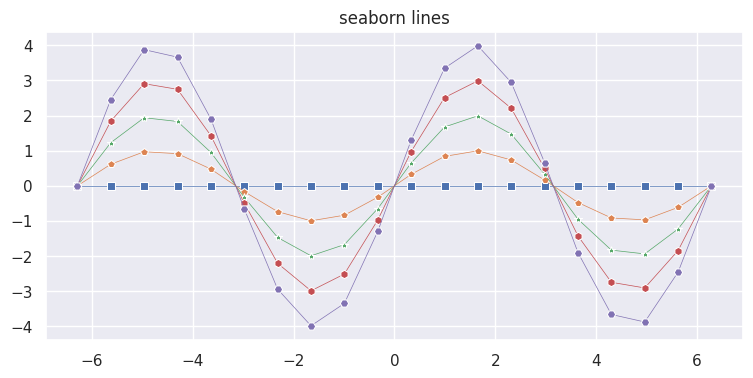

In [20]:
x = np.linspace(-2*np.pi, 2*np.pi, 20)
markers = list(pl.Line2D.markers.keys())
sb.set(rc={'figure.figsize':(9, 4)})
for i in range(5):
    sb.lineplot(x=x, y=np.sin(x)*i, lw=.5, marker=markers[i+12])
sb.lineplot().set(title='seaborn lines');

In [21]:
color_lst = ['#FF355E', '#FD5B78', '#FF6037', '#FF9966', '#FF9933', '#FFCC33',
             '#FFFF66', '#CCFF00', '#66FF66', '#AAF0D1', '#50BFE6', '#FF6EFF',
             '#EE34D2', '#FF00CC']
data = alt.sequence(-.1, 12.7, .2, as_='x')
base = alt.Chart(data).encode(x='x:Q').properties(width=700, height=400)
line = lambda i: base.transform_calculate(y='%d * sin(datum.x)'%i)\
                     .mark_line(color=color_lst[i], description=str(i),
                                point=alt.OverlayMarkDef(
                                    color=color_lst[i], size=7,
                                    filled=False, fill="white"))\
                     .encode(y='y:Q')
text = lambda i: alt.Chart({'values':[{'x': 13.4, 'y': .5+i}]}).mark_text(
    text='y = %d * sin(x)'%i, color=color_lst[i]).encode(x='x:Q', y='y:Q')
def psum(start, end):
    s = line(start) + text(start)
    for i in range(start, end+1): s += line(i) + text(i)
    return s
(psum(0, 13)).resolve_scale()

alt.LayerChart(...)

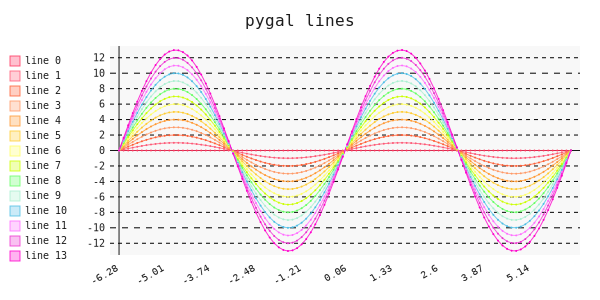

In [22]:
from IPython.display import SVG, display
x = np.linspace(-2*np.pi, 2*np.pi, 100)
color_lst = ['#FF355E', '#FD5B78', '#FF6037', '#FF9966', '#FF9933', '#FFCC33',
             '#FFFF66', '#CCFF00', '#66FF66', '#AAF0D1', '#50BFE6', '#FF6EFF',
             '#EE34D2', '#FF00CC']
line = pg.Line(
    fill=False, height=300, width=600, dots_size=.5, legend_box_size=10,
    x_label_rotation=-30, x_labels_major_every=10, show_minor_x_labels=False,
    style = pg.style.BlueStyle(
        opacity='.3', colors=color_lst,
        legend_font_size=10, background='transparent'))
line.title = 'pygal lines'
line.x_labels = list(map(str, np.round(x, 2)))
for i in range(14):
    line.add('line %d'%i, np.sin(x)*i)
line.render_to_file('example.svg')
display(SVG(open('example.svg', 'rb').read()))

In [23]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure, gridplot, output_file, show
from bokeh.transform import linear_cmap
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = lambda i: i*np.sin(x)
palette_lst = ['Turbo', 'Set1', 'Spectral', 'Pastel1', 'Bokeh',
               'Category20', 'Plasma', 'Light', 'Set2', 'Sunset',
               'Set3', 'Accent', 'Magma', 'Pastel2']
color_map = lambda i: linear_cmap(
    field_name='y', palette=bokeh.palettes.all_palettes[palette_lst[i]][8],
    low=min(y(i)), high=max(y(i)))
color_lst = ['#FF355E', '#FD5B78', '#FF6037', '#FF9966', '#FF9933', '#FFCC33',
             '#FFFF66', '#CCFF00', '#66FF66', '#AAF0D1', '#50BFE6', '#FF6EFF',
             '#EE34D2', '#FF00CC']
TOOLS = 'pan, wheel_zoom, box_zoom, reset, save, box_select'
p1 = figure(title='boken circles', tools=TOOLS)
for i in range(14):
    p1.circle(x, y(i), legend_label=u'y = %d * sin(x)'%i,
              size=3, line_color=color_map(i))
p1.legend.title='functions'
p1.legend.location='top_right'
p2 = figure(title='boken squares', tools=TOOLS)
for i in range(14):
    p2.square(x, y(i), legend_label=u'y = %d * sin(x)'%i,
              size=3, fill_color=None, line_color=color_lst[i])
    p2.line(x, y(i), line_color=color_lst[i])
p2.legend.title='functions'
p2.legend.location='top_right'
output_file('bokeh_legend.html', title='plotting examples')
show(gridplot([p1, p2], ncols=1, width=700, height=420))

In [31]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)
color_lst = ['#FF355E', '#FD5B78', '#FF6037', '#FF9966', '#FF9933', '#FFCC33',
             '#FFFF66', '#CCFF00', '#66FF66', '#AAF0D1', '#50BFE6', '#FF6EFF',
             '#EE34D2', '#FF00CC']
series_dict = lambda i: {
    'marker':{'symbol':'diamond', 'lineColor':'silver', 'lineWidth':1,
              'fillColor':'#ffffff', 'radius':2},
    'color':color_lst[i-1], 'name':f'{i}* sin(x)'}
my_chart = hch.Chart.from_array(
    np.array([x, y]).T,
    series_kwargs=series_dict(1), chart_kwargs={},
    options_kwargs={'title':{'text':"highcharts' lines"},
                    'chart':{'height':600, 'width':900}})
for i in range(2, 15):
    my_series = hch.LineSeries.from_array(
        np.array([x, y*i]).T, series_kwargs=series_dict(i))
    my_chart.add_series(my_series)
#my_chart.display()

In [25]:
def configure_plotly():
    from IPython.display import HTML, display
    import cufflinks as cf
    display(HTML("""
    <script src='/static/components/requirejs/require.js'></script>
    <script>requirejs.config(
    {paths:{base:'/static/base',
            plotly:'https://cdn.plot.ly/plotly-1.5.1.min.js?noext'}});
    </script>"""))
    cf.go_offline()

In [26]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
configure_plotly()
init_notebook_mode(connected=False)
x = np.linspace(-2*np.pi, 2*np.pi, 100)
color_lst = ['#FF355E', '#FD5B78', '#FF6037', '#FF9966', '#FF9933', '#FFCC33',
             '#FFFF66', '#CCFF00', '#66FF66', '#AAF0D1', '#50BFE6', '#FF6EFF',
             '#EE34D2', '#FF00CC']
go1 = [go.Scatter(x=x, y=np.sin(x)*i, name=f'line {i}', mode='lines+markers',
                  line=dict(color=color_lst[i], width=1),
                  marker=dict(size=3))
       for i in range(14)]
layout1 = go.Layout(width=700, height=500, template='plotly_white')
iplot({'data':go1, 'layout':layout1})

Output hidden; open in https://colab.research.google.com to view.

Basic cartography objects

Objetos cartográficos básicos

In [27]:
m = folium.Map(location=(55.7558, 37.6173),
               zoom_start=16, tiles="OpenStreetMap")
ff = 'Ewert'
html_str = lambda s: f"""
<style>@import 'https://fonts.googleapis.com/css?family={ff}';</style>
<div style='color:#3636ff; font-family:{ff}; font-size:24px;'><p>
{s}</p></div>"""
folium.Marker(
    location=[55.7558, 37.6173], popup='State Historical Museum',
    icon=folium.DivIcon(html=html_str('State Historical Museum'))).add_to(m)
folium.Marker(
    location=[55.7583, 37.6198], popup='Theatre Square',
    icon=folium.DivIcon(html=html_str('Theatre Square'))).add_to(m)
m.save("map_example.html")
m